<a href="https://colab.research.google.com/github/BobChrismansyah/Citra-Data/blob/main/Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nomor 1
Diberikan citra rice, Lakukan deteksi tepi pada citra tersebut dan jelaskan perbedaan
hasilnya menggunakan operator Laplace dan operator Laplace of Gaussian (LoG)

Operator Laplace

|   |  |  |
|--|:--:|--:|
| 0 |  1 | 0 |
| 1 |  -1 | 1 |
| 0 | 1| 0 |

Operator LoG

| 0  | 0  | -1 | 0  | 0  |
|----|----|----|----|----|
| 0  | -1 | -2 | -1 | 0  |
| -1 | -2 | 16 | -2 | -1 |
| 0  | -1 | -2 | -1 | 0  |
| 0  | 0  | -1 | 0  | 0  |

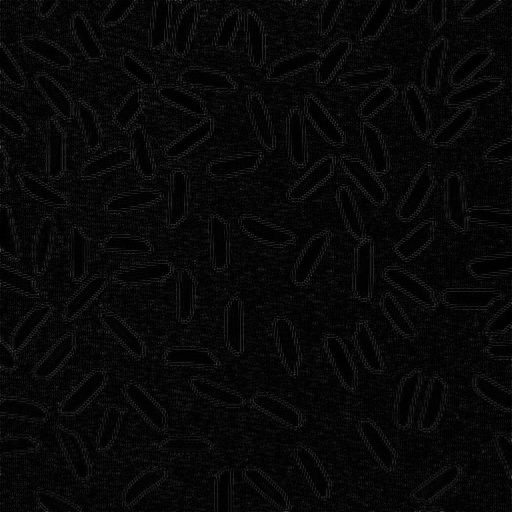

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('rice.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
laplace = cv2.Laplacian(gray_image, cv2.CV_64F)
laplace = np.uint8(np.absolute(laplace))


cv2_imshow(laplace)

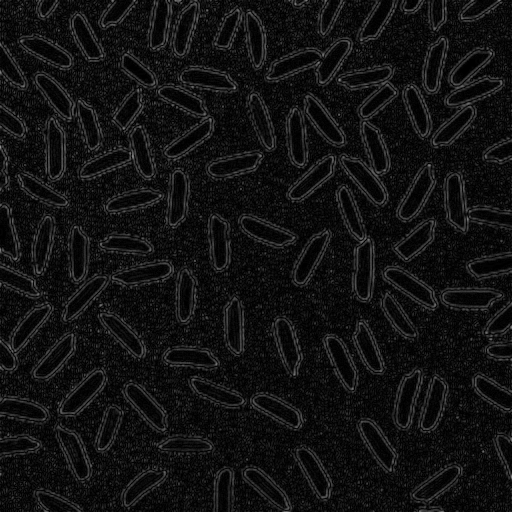

In [ ]:
kernel_size = 3
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread('rice.png')
img = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray_lap = cv2.Laplacian(gray,ddepth,ksize = kernel_size,scale = scale,delta = delta)
dst = cv2.convertScaleAbs(gray_lap)

cv2_imshow(dst)

hasil citra menggunakan operator Laplace dan operator Laplace of Gussian yaitu jika menggunakan operator laplace maka akan mendeteksi tepi yang curam sehingga hasilnya kurang rapih. Untuk pendetksian tepi menggunakan Laplace of Gussian hasilnya akurat dan rapih.

#Nomor 2
Lakukan filter Sobel, Prewitt, Roberts untuk deteksi tepi pada citra berikut boat, lena,
bird, dan peppers. Tentukan dan jelaskan metode terbaik untuk masing-masing citra.

##Boat

###Metode terbaik untuk gambar Boat yaitu menggunakan metode Prewit karena menggunaakan high pass filter.

In [ ]:
import cv2
import numpy as np


img = cv2.imread('boat.tiff');

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

#roberts 
filterX = np.array([[0,1],[-1,0]])
filterY = np.array([[1,0],[0,-1]])
img_X = cv2.filter2D(gray, -1, filterX)
img_Y = cv2.filter2D(gray, -1, filterY)
    
roberts=img_X+img_Y
scale_factor = np.max(roberts)/255
roberts = (roberts/scale_factor).astype(np.uint8)
cv2.normalize(roberts, roberts, 0, 255, cv2.NORM_MINMAX, dtype=-1)
roberts = roberts.astype(np.uint8)


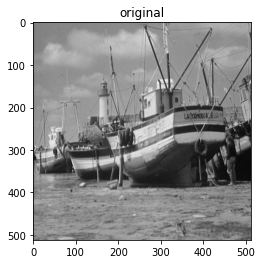

In [ ]:
plt.title("original")
plt.imshow(img)

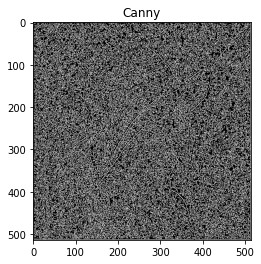

In [ ]:
plt.title("Canny")
plt.imshow(img_canny, cmap='gray')

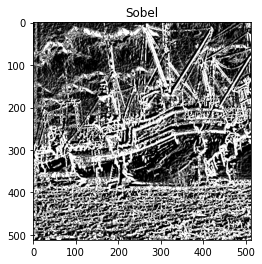

In [ ]:
plt.title("Sobel")
plt.imshow(img_sobel, cmap='gray')

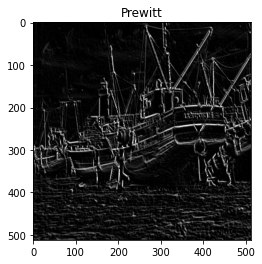

In [ ]:
plt.title("Prewitt")
plt.imshow(img_prewittx + img_prewitty, cmap='gray')
plt.show()

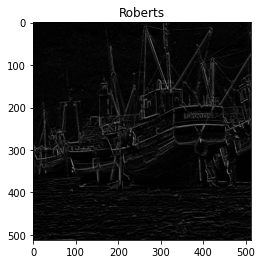

In [ ]:
plt.title("Roberts")
plt.imshow(roberts, cmap='gray')

##Lena
Metode terbaik untuk citra lena yaitu menggunakan metode roberts karena berbasis gradient, karena dalam gambar tersebut pola warnanya bergradient

In [ ]:
img = cv2.imread('lena.bmp')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


#roberts 
filterX = np.array([[0,1],[-1,0]])
filterY = np.array([[1,0],[0,-1]])
img_X = cv2.filter2D(gray, -1, filterX)
img_Y = cv2.filter2D(gray, -1, filterY)
    
roberts=img_X+img_Y
scale_factor = np.max(roberts)/255
roberts = (roberts/scale_factor).astype(np.uint8)
cv2.normalize(roberts, roberts, 0, 255, cv2.NORM_MINMAX, dtype=-1)
roberts = roberts.astype(np.uint8)


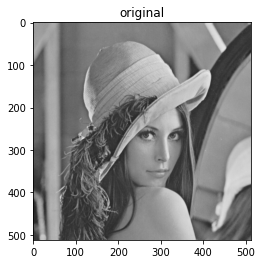

In [ ]:
plt.title("original")
plt.imshow(img, cmap='gray')

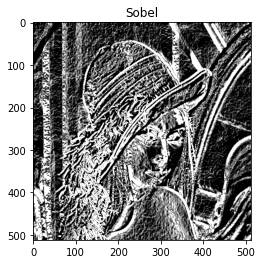

In [ ]:
plt.title("Sobel")
plt.imshow(img_sobel, cmap='gray')

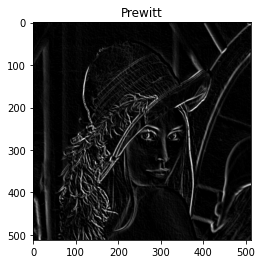

In [ ]:
plt.title("Prewitt")
plt.imshow(img_prewittx + img_prewitty, cmap='gray')

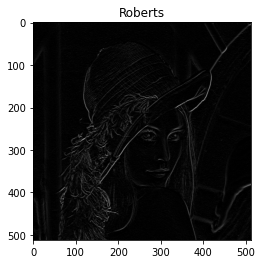

In [ ]:
plt.title("Roberts")
plt.imshow(roberts, cmap='gray')

##Bird
Metode terbaik untuk citra bird yaitu menggunakan metode roberts karena berbasis gradient, karena dalam gambar tersebut pola warnanya bergradient

In [ ]:
img = cv2.imread('bird.bmp')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


#roberts 
filterX = np.array([[0,1],[-1,0]])
filterY = np.array([[1,0],[0,-1]])
img_X = cv2.filter2D(gray, -1, filterX)
img_Y = cv2.filter2D(gray, -1, filterY)
    
roberts=img_X+img_Y
scale_factor = np.max(roberts)/255
roberts = (roberts/scale_factor).astype(np.uint8)
cv2.normalize(roberts, roberts, 0, 255, cv2.NORM_MINMAX, dtype=-1)
roberts = roberts.astype(np.uint8)

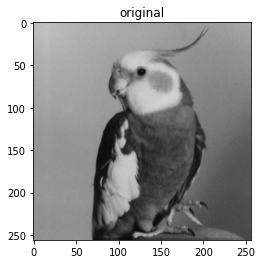

In [ ]:
plt.title("original")
plt.imshow(img, cmap='gray')

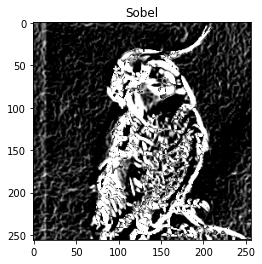

In [ ]:
plt.title("Sobel")
plt.imshow(img_sobel, cmap='gray')

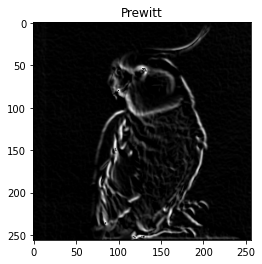

In [ ]:
plt.title("Prewitt")
plt.imshow(img_prewittx + img_prewitty, cmap='gray')

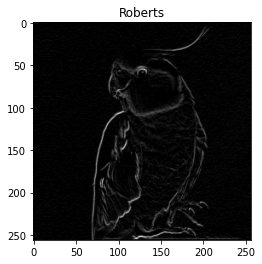

In [ ]:
plt.title("Roberts")
plt.imshow(roberts, cmap='gray')

##Peppers
Metode terbaik utnuk citra peppers yaitu menggunakan metode roberts karena dalam gambar itu juga menggunakan gradient warna sehingga dengan mudah tepi dideteksi menggunakan metode roberts

In [ ]:
img = cv2.imread('peppers.tiff')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


#roberts 
filterX = np.array([[0,1],[-1,0]])
filterY = np.array([[1,0],[0,-1]])
img_X = cv2.filter2D(gray, -1, filterX)
img_Y = cv2.filter2D(gray, -1, filterY)
    
roberts=img_X+img_Y
scale_factor = np.max(roberts)/255
roberts = (roberts/scale_factor).astype(np.uint8)
cv2.normalize(roberts, roberts, 0, 255, cv2.NORM_MINMAX, dtype=-1)
roberts = roberts.astype(np.uint8)

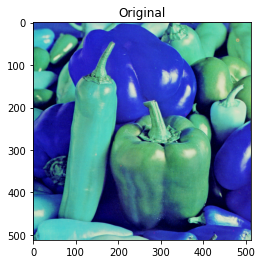

In [ ]:
plt.title("Original")
plt.imshow(img)

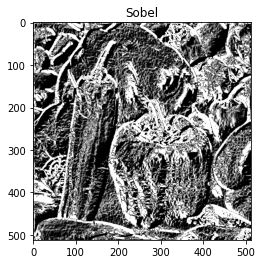

In [ ]:
plt.title("Sobel")
plt.imshow(img_sobel, cmap='gray')

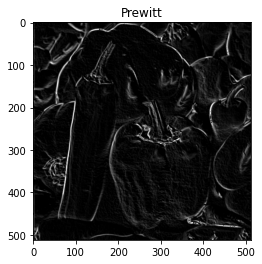

In [ ]:
plt.title("Prewitt")
plt.imshow(img_prewittx + img_prewitty, cmap='gray')

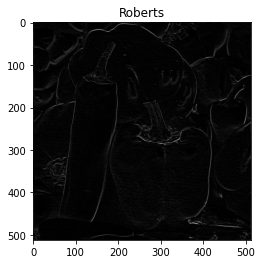

In [ ]:
plt.title("Roberts")
plt.imshow(roberts, cmap='gray')

#Nomor 3

Lakukan deteksi tepi pada citra lena_noise dengan filter Canny.

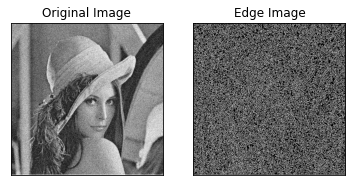

In [ ]:
img = cv.imread('lena_noise.jpg',0)

edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')

plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

karena terdapat noise maka harus dihilangkan noise 

#Nomor 4
Lakukan deteksi tepi pada citra lena_noise dengan terlebih dahulu melakukan median
filter dilanjutkan dengan filter Canny.

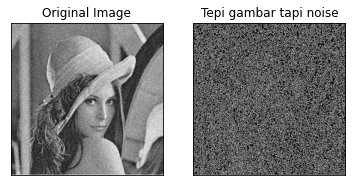

In [ ]:
img = cv.imread('lena_noise.jpg',0)

edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')

plt.title('Tepi gambar tapi noise'), plt.xticks([]), plt.yticks([])
plt.show()

Menghilangkan noise menggunakan median filter dilanjutkan filter Canny

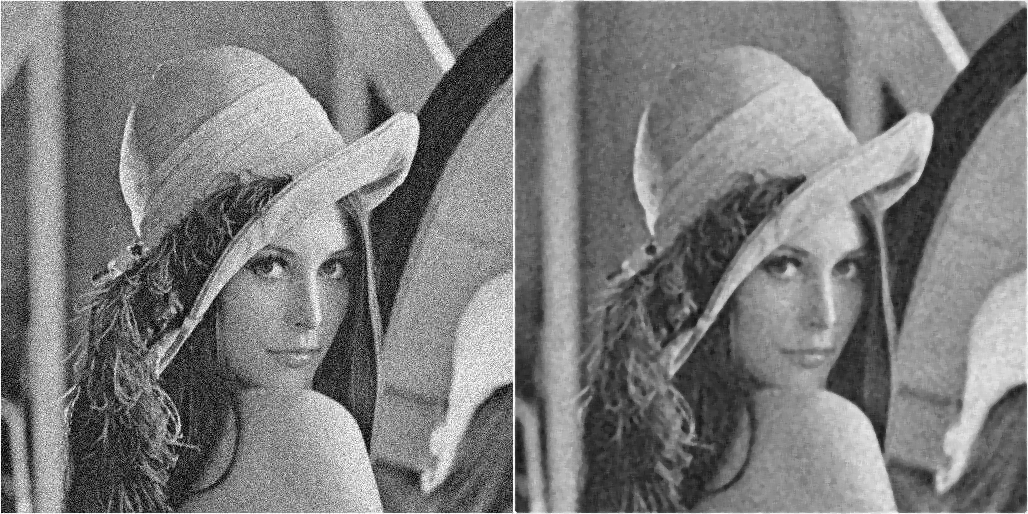

In [ ]:
img = cv2.imread('lena_noise.jpg')
median = cv2.medianBlur(img, 5)
compare = np.concatenate((img, median), axis=1)

cv2_imshow(compare)

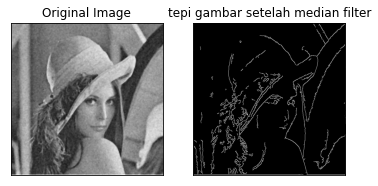

In [ ]:
edges = cv.Canny(median,100,200)

plt.subplot(121),plt.imshow(median,cmap = 'gray')

plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')

plt.title('tepi gambar setelah median filter'), plt.xticks([]), plt.yticks([])
plt.show()